In [9]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
train = pd.read_csv('/content/gdrive/MyDrive/MIRCVProject (1)/Datasets_metadata/train_test_split/training_set.csv')
test = pd.read_csv('/content/gdrive/MyDrive/MIRCVProject (1)/Datasets_metadata/train_test_split/test_set.csv')
valid = pd.read_csv('/content/gdrive/MyDrive/MIRCVProject (1)/Datasets_metadata/train_test_split/valid_set.csv')
distractor = pd.read_csv('/content/gdrive/MyDrive/MIRCVProject (1)/Datasets_metadata/Distractor/distractor.csv')
distractor['labels'] = ['distractor']*len(distractor)
distractor['data set'] = ['distractor']*len(distractor)
database = train.append(distractor).reset_index(drop=True)


In [12]:
def compute_AP(groundtruth, retrieved, k):
  """ Computes the Average Precision.
  Args:
    - groundtruth (ndarray): a (Q,N)-shaped boolean matrix indicating relevance
                             of database elements to queries, i.e., if
                             groundtruth[3,2] is True, then the database element
                             #2 is relevant to the query #3.
    - retrieved (ndarray): a (Q,K)-shaped boolean matrix indicating the retrieved
                              elements for each query, i.e., if
                              retrieved[3,2] is 100, then the database element
                              #100 is the second retrieved neighbor for the query #3.
  Returns:
    - aps (ndarray): a (Q,)-shaped array containing the Average Precision @ K
                     for each query.
  """
  n_queries = len(groundtruth)
  """
  # get relevance of retrieved elements
  ranked_relevance = groundtruth[np.arange(n_queries).reshape(-1, 1), retrieved]
  total_relevant_items = ranked_relevance.sum(axis=1)
  # Precision@i for each query, i.e. the number of relevant items @i divided by i
  prec_at_i = ranked_relevance.cumsum(axis=1) / np.arange(1, k + 1)  
  # sum of prec_at_i only for relevant, divide for total number of relevant items (for each query)
  aps = (ranked_relevance * prec_at_i).sum(axis=1) / total_relevant_items
  for i in range(len(aps)):
    if math.isnan(aps[i]):
      aps[i] = 0
  """
  #or
  aps = []
  for i in range(0, n_queries):
    ranked_relevance = groundtruth[i, retrieved[i]]
    relevant_items = ranked_relevance.sum()
    precision = ranked_relevance.cumsum()
    prec_at_i = []
    for j in range(1, ranked_relevance.size+1):
      x = precision[j-1]/(j)
      prec_at_i.append(x)
    prec_at_i = np.array(prec_at_i)
    if relevant_items == 0:
      aps.append(0.0)
    else:
      aps.append((ranked_relevance * prec_at_i).sum() / relevant_items)
  aps = np.array(aps) 
   
  return aps

In [13]:
def compute_groundtruth(query_index, test_dataset, dataset):
  """ Computes the groundtruth for a given query 
  Args:
    - query_index (int): the index of the query element in the test_dataset.
    - test_dataset (dataframe): the pandas dataframe that represents the test dataset
                                from which the query is selected.
    - dataset (dataframe): the pandas dataframe that represents the dataset
                           on which the query is executed.
  Returns:
    - groundtruth (array): a boolean array indicating the relevance of each element of
                           dataset for the given query_index
  """
  query_label = test_dataset["labels"][query_index]
  labels = dataset["labels"]
  groundtruth = np.zeros(len(dataset), dtype=bool)
  for i in range(len(labels)):
    label = labels[i]
    groundtruth[i] = (label == query_label)
  return groundtruth

In [14]:
def compute_groundtruth_matrix(query_indexes, test_dataset, dataset):
  matrix = []
  for index in query_indexes:
    gt = compute_groundtruth(index, test_dataset, dataset)
    matrix.append(gt)
  return np.array(matrix)

In [15]:
query_indexes = np.array(range(100))
groundtruth = compute_groundtruth_matrix(query_indexes, test, database)

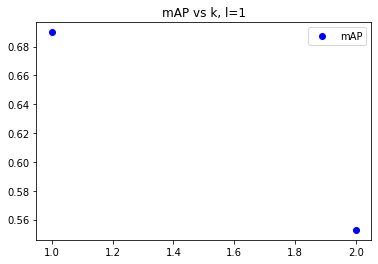

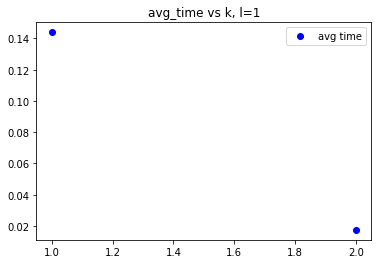

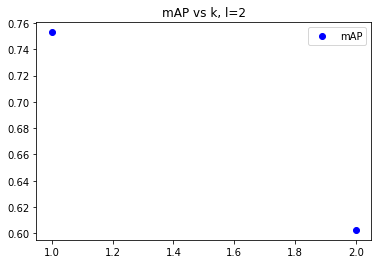

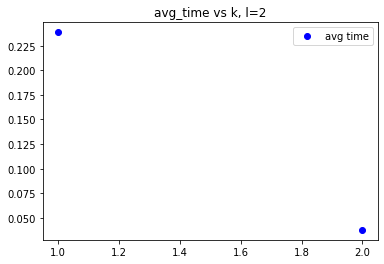

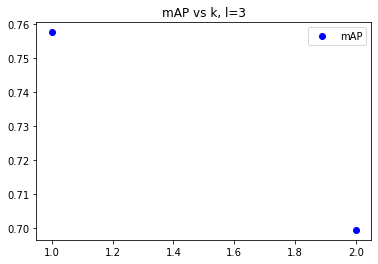

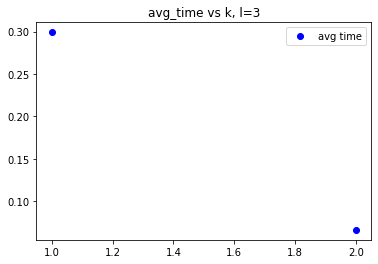

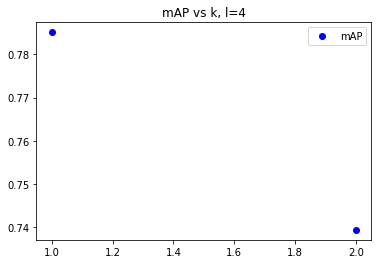

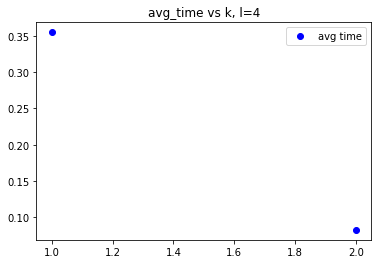

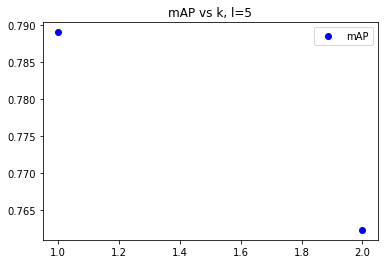

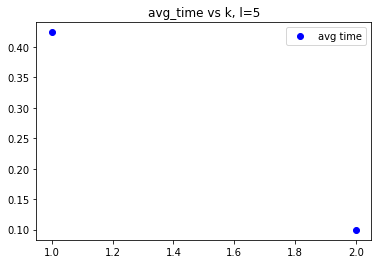

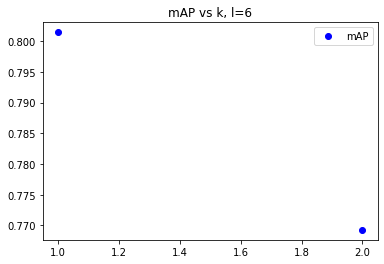

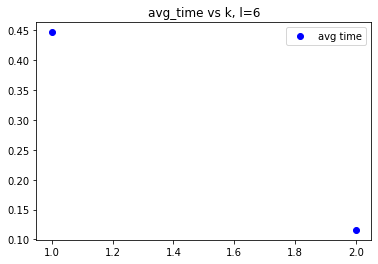

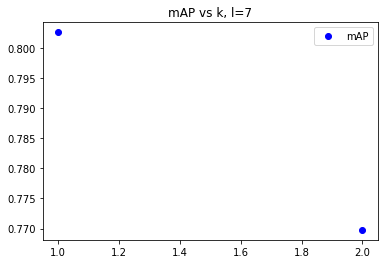

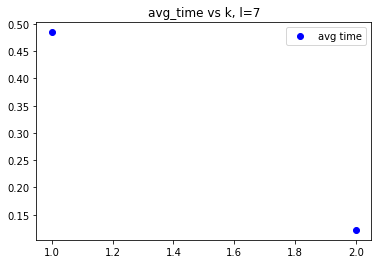

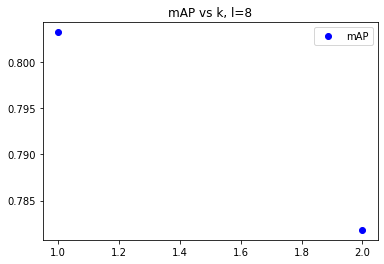

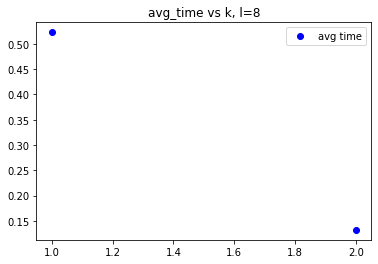

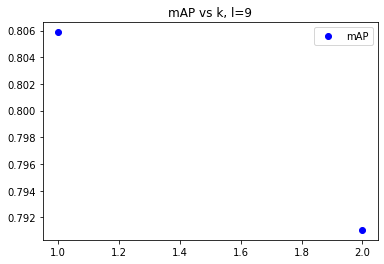

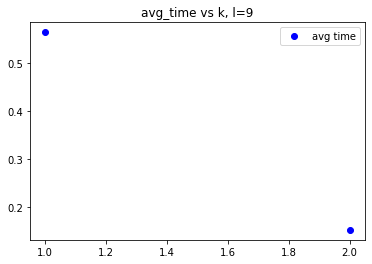

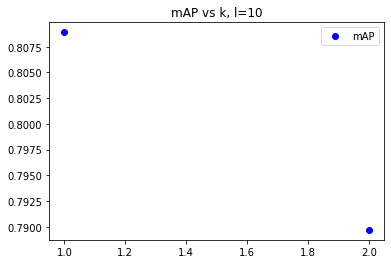

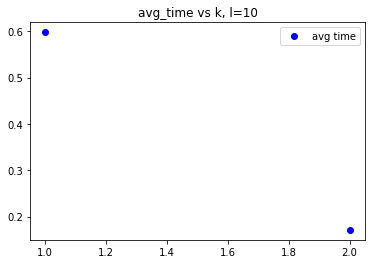

In [21]:
results_nft_nb = np.load("/content/gdrive/MyDrive/MIRCVProject (1)/Performance/results_nft_nb.npy", allow_pickle=True)
results = []
for result in results_nft_nb:
  results.append([result[0], result[1], compute_AP(groundtruth, result[2], 10).mean(), result[3]])
results

for n_g in range(1, 11):
  n_h = []
  mAP = []
  avg_time = []
  for result in results:
    if result[0]==n_g:
      n_h.append(result[1])
      mAP.append(result[2])
      avg_time.append(result[3])
  
  plt.plot(n_h, mAP, 'bo', label='mAP')
  plt.title('mAP vs k, l='+str(n_g))
  plt.legend()

  plt.figure()

  plt.plot(n_h, avg_time, 'bo', label='avg time')
  plt.title('avg_time vs k, l='+str(n_g))
  plt.legend()

  plt.show()


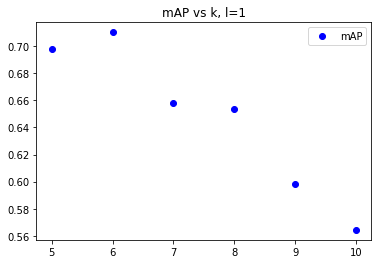

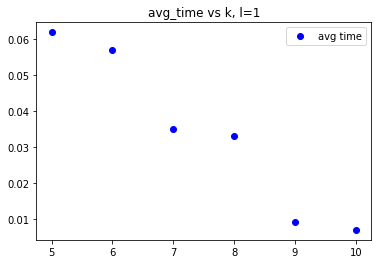

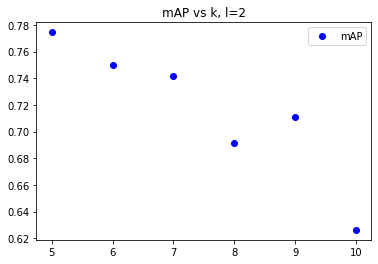

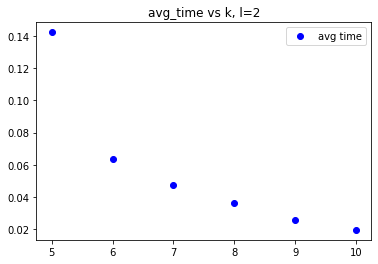

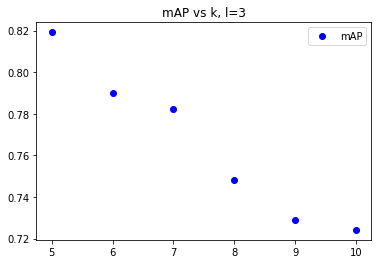

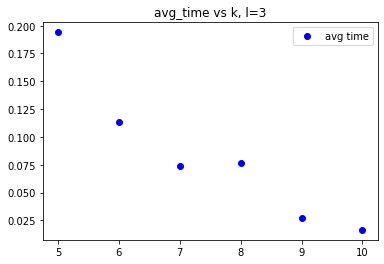

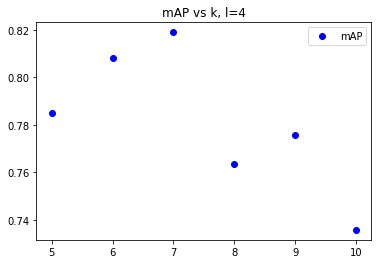

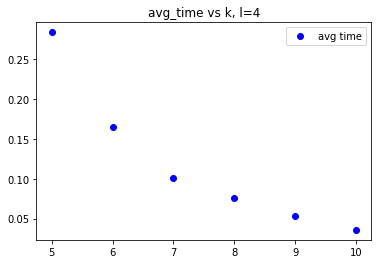

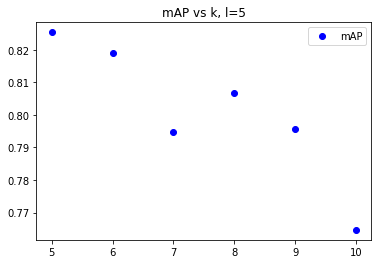

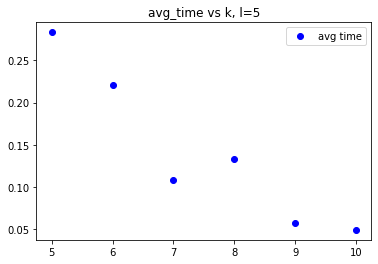

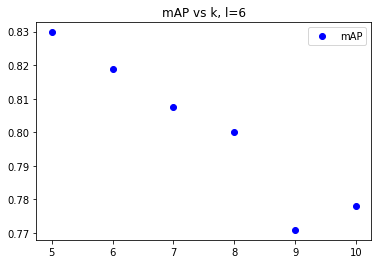

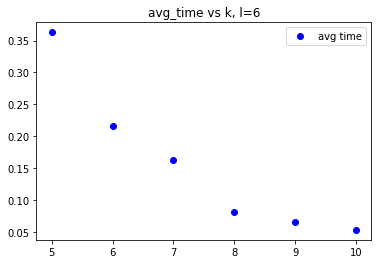

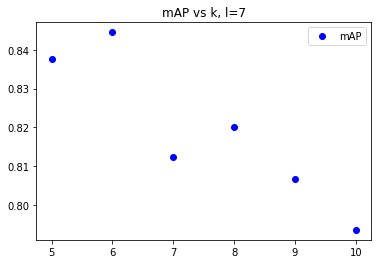

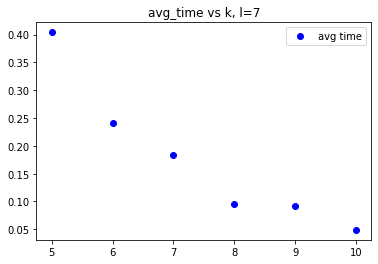

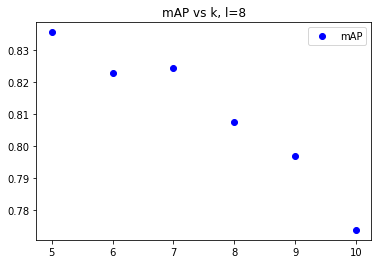

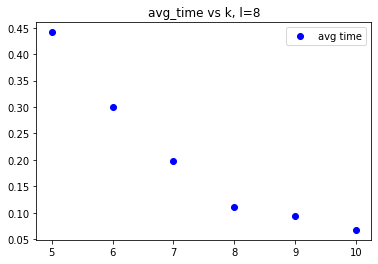

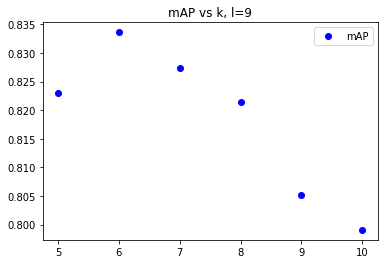

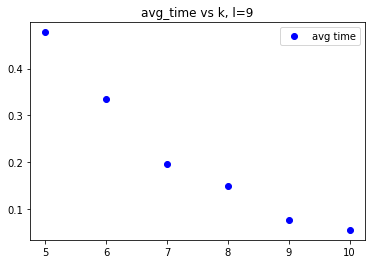

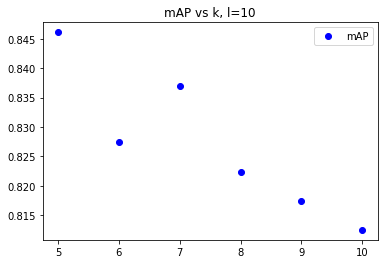

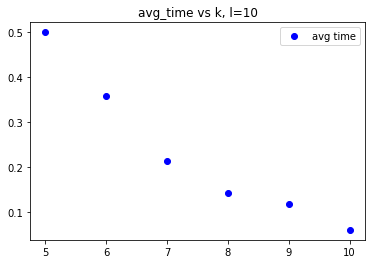

In [23]:
results_nft_b = np.load("/content/gdrive/MyDrive/MIRCVProject (1)/Performance/results_nft_b.npy", allow_pickle=True)
results = []
for result in results_nft_b:
  results.append([result[0], result[1], compute_AP(groundtruth, result[2], 10).mean(), result[3]])
  
for n_g in range(1, 11):
  n_h = []
  mAP = []
  avg_time = []
  for result in results:
    if result[0]==n_g:
      n_h.append(result[1])
      mAP.append(result[2])
      avg_time.append(result[3])
  
  plt.plot(n_h, mAP, 'bo', label='mAP')
  plt.title('mAP vs k, l='+str(n_g))
  plt.legend()

  plt.figure()

  plt.plot(n_h, avg_time, 'bo', label='avg time')
  plt.title('avg_time vs k, l='+str(n_g))
  plt.legend()

  plt.show()

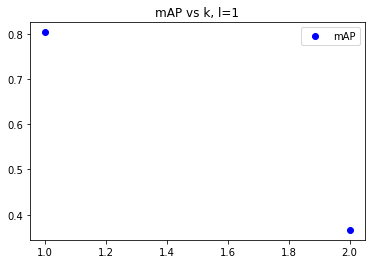

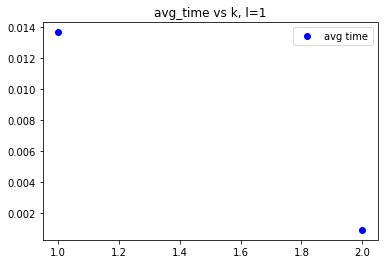

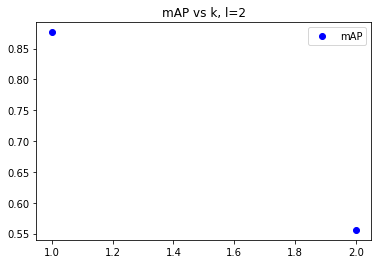

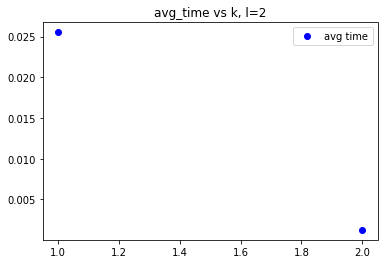

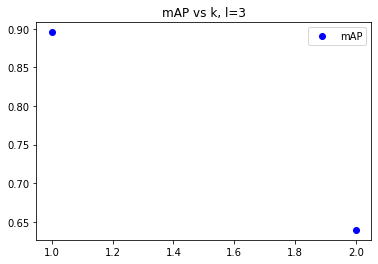

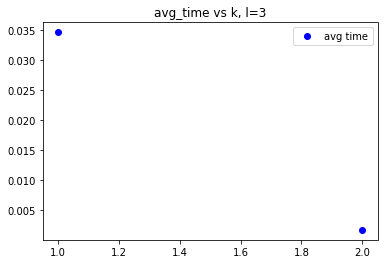

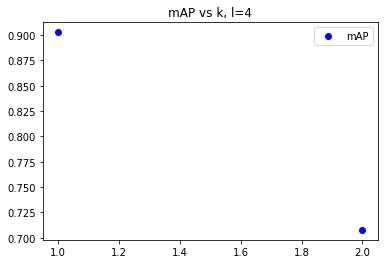

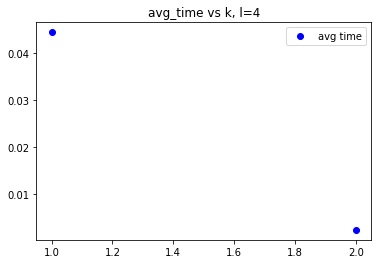

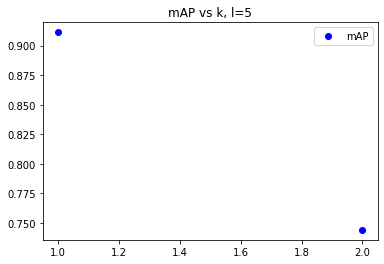

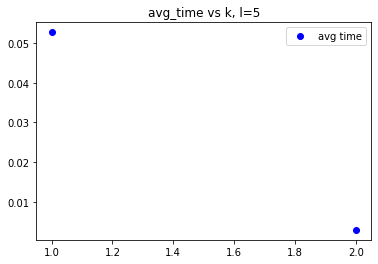

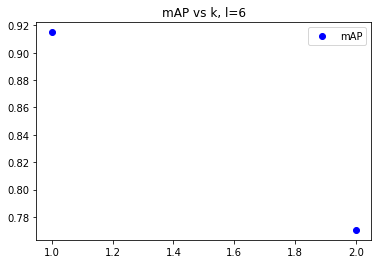

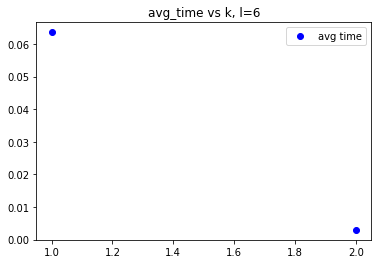

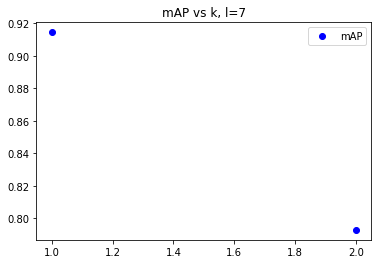

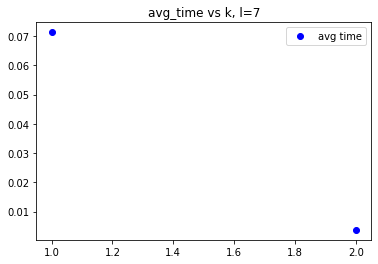

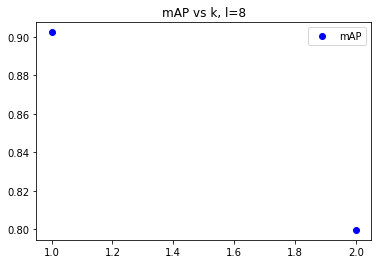

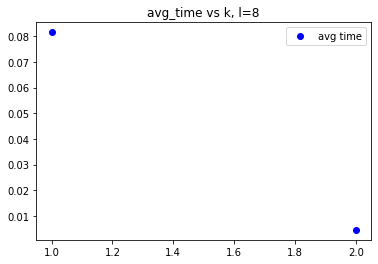

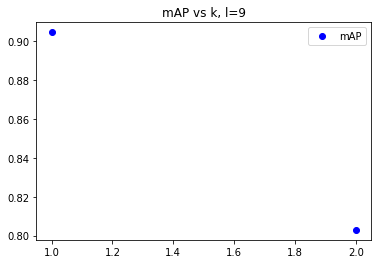

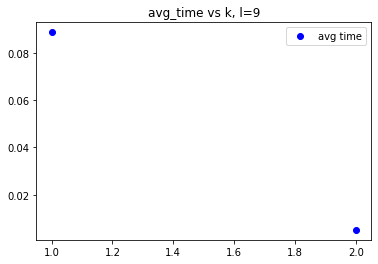

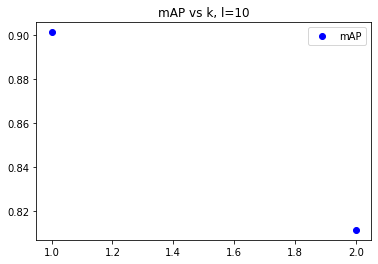

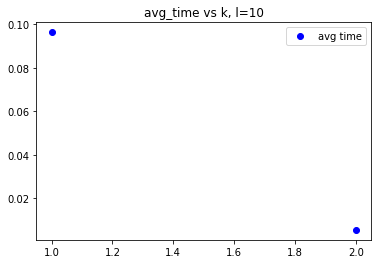

In [24]:
results_ft_nb = np.load("/content/gdrive/MyDrive/MIRCVProject (1)/Performance/results_ft_nb.npy", allow_pickle=True)
results = []
for result in results_ft_nb:
  results.append([result[0], result[1], compute_AP(groundtruth, result[2], 10).mean(), result[3]])
  
for n_g in range(1, 11):
  n_h = []
  mAP = []
  avg_time = []
  for result in results:
    if result[0]==n_g:
      n_h.append(result[1])
      mAP.append(result[2])
      avg_time.append(result[3])
  
  plt.plot(n_h, mAP, 'bo', label='mAP')
  plt.title('mAP vs k, l='+str(n_g))
  plt.legend()

  plt.figure()

  plt.plot(n_h, avg_time, 'bo', label='avg time')
  plt.title('avg_time vs k, l='+str(n_g))
  plt.legend()

  plt.show()

plt.show()

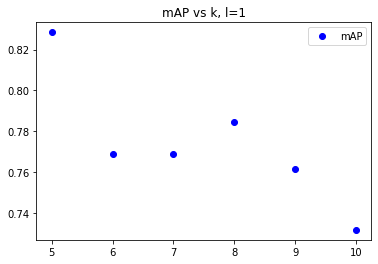

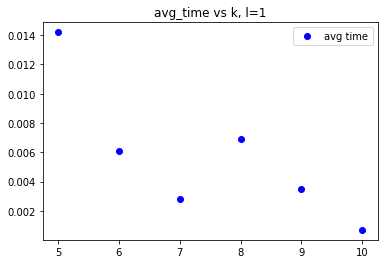

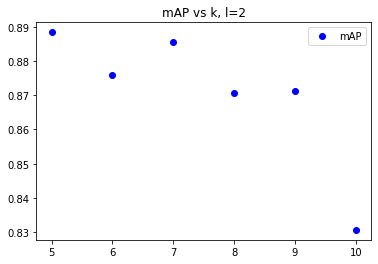

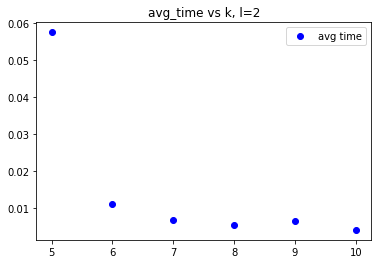

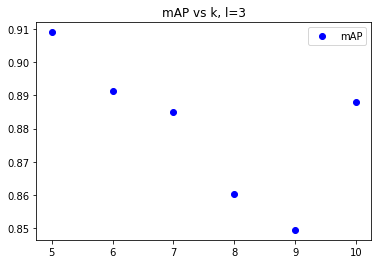

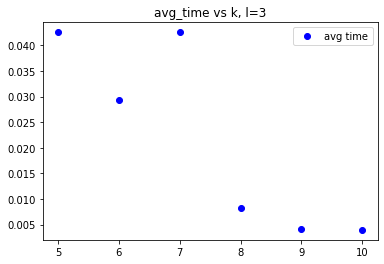

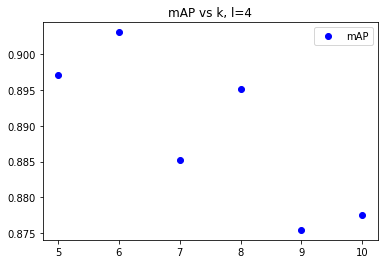

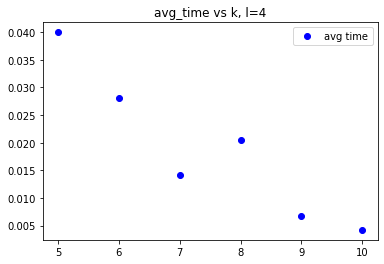

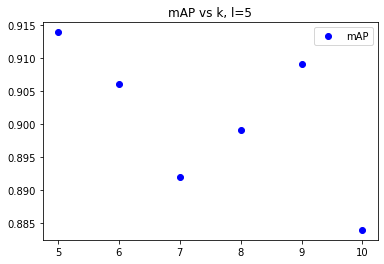

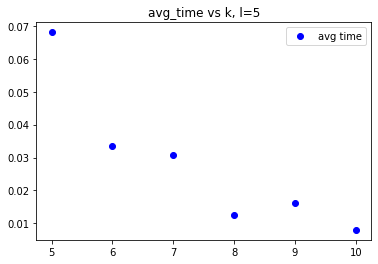

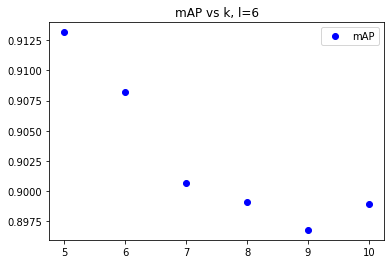

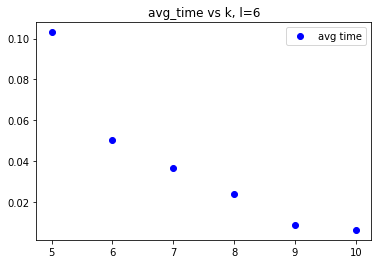

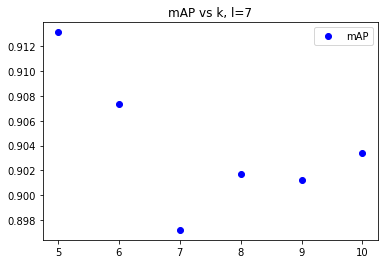

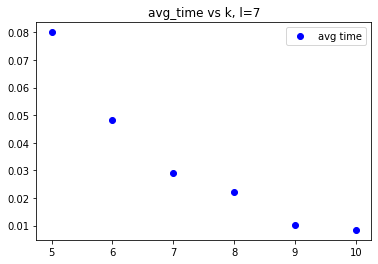

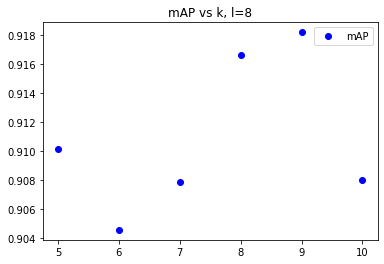

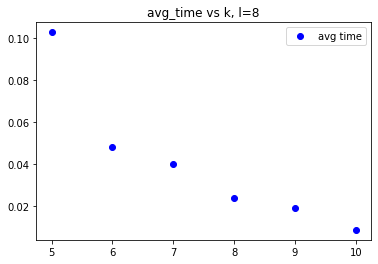

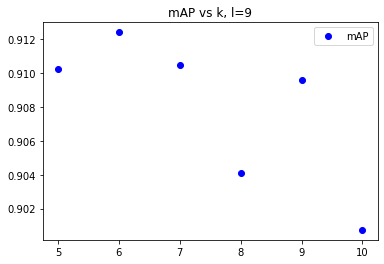

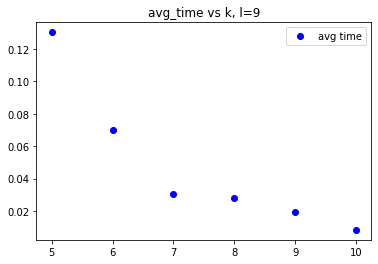

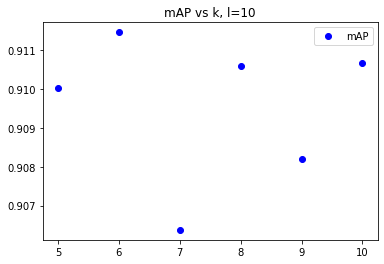

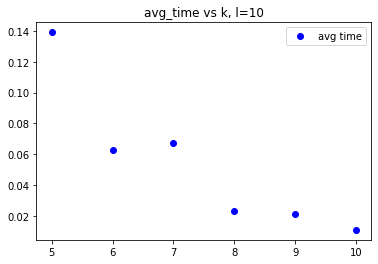

In [25]:
results_ft_b = np.load("/content/gdrive/MyDrive/MIRCVProject (1)/Performance/results_ft_b.npy", allow_pickle=True)
results = []
for result in results_ft_b:
  results.append([result[0], result[1], compute_AP(groundtruth, result[2], 10).mean(), result[3]])
  
for n_g in range(1, 11):
  n_h = []
  mAP = []
  avg_time = []
  for result in results:
    if result[0]==n_g:
      n_h.append(result[1])
      mAP.append(result[2])
      avg_time.append(result[3])
  
  plt.plot(n_h, mAP, 'bo', label='mAP')
  plt.title('mAP vs k, l='+str(n_g))
  plt.legend()

  plt.figure()

  plt.plot(n_h, avg_time, 'bo', label='avg time')
  plt.title('avg_time vs k, l='+str(n_g))
  plt.legend()

  plt.show()